In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [64]:
def repeatedly_apply(matrix, sequence_length, perturb=0.0, nonlin=None):
    """Generates a random vector and repeatedly applies matrix to it
    sequence_length times, returning the result as an n x sequence_length+1 matrix.
    Optionally perturbs with noise at each stage to simulate an RNN"""
    vector = np.random.normal(size=(matrix.shape[0], 1))
    results = [vector]
    # there's probably a nice functional way to do this
    for _ in range(sequence_length):
        results.append(np.dot(matrix, results[-1]))
        if perturb > 0.0:
            results[-1] += np.random.normal(scale=perturb, size=vector.shape)
        if nonlin:
            results[-1] = nonlin(results[-1])
    return  np.hstack(results)

def repeatedly_apply_skip(matrix, sequence_length, perturb=0.0, nonlin=None, 
                          forget_gates=None, input_gates=None):
    """Generate a random vector and repeatedly apply with a gated skip connection"""
    vector = np.random.normal(size=(matrix.shape[0], 1))
    if forget_gates is None:
        forget_gates = np.ones((sequence_length, matrix.shape[0]))
    if input_gates is None:
        input_gates = np.ones((sequence_length, matrix.shape[0]))
    results = [vector]
    for i in range(sequence_length):
        candidate = np.dot(matrix, results[-1])
        if perturb > 0.0:
            candidate += np.random.normal(scale=perturb, size=vector.shape)
        if nonlin:
            candidate = nonlin(candidate)
        a = forget_gates[i][:, None] * results[-1]
        b = candidate * input_gates[i][:, None]
        results.append(a + b)
    return np.hstack(results)

In [65]:
fgates = np.random.uniform(size=(500, 100))
oneminusfgates = 1.0 - fgates

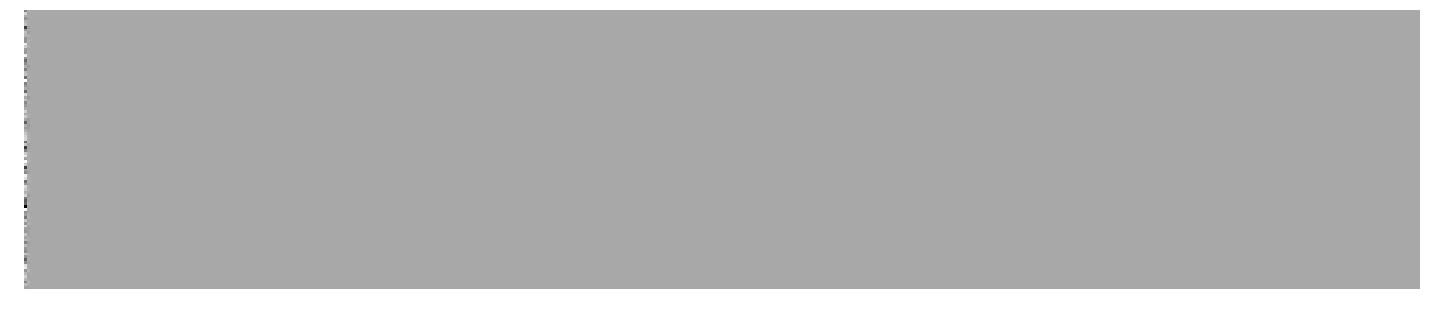

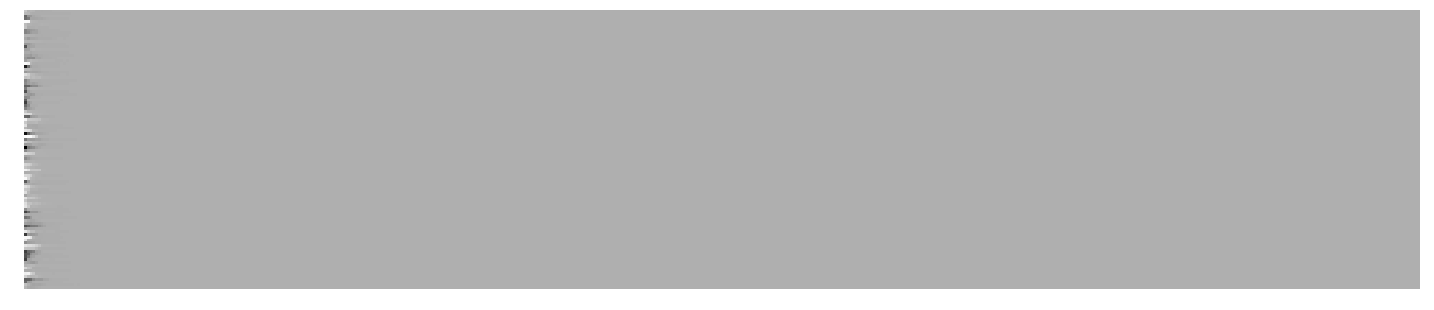

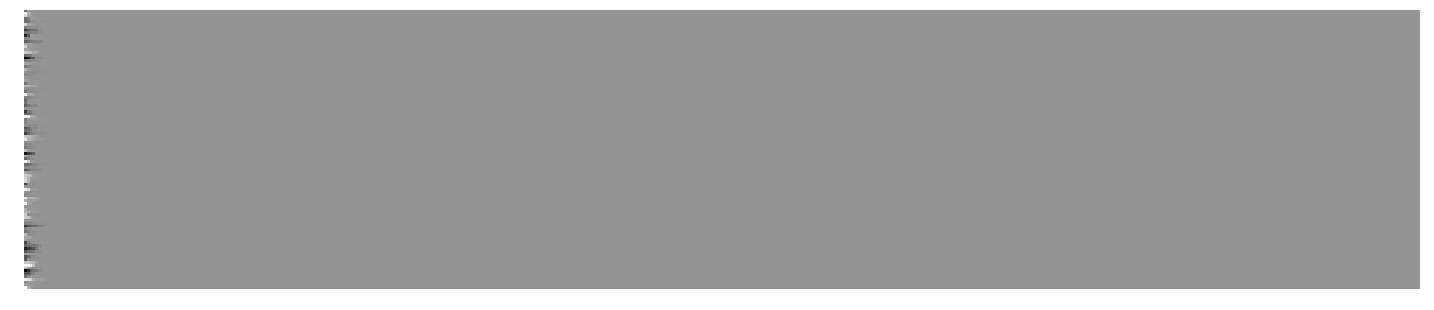

In [66]:
mat = np.random.normal(scale=0.01, size=(100, 100))
results = repeatedly_apply(mat, 500)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, input_gates=oneminusfgates)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

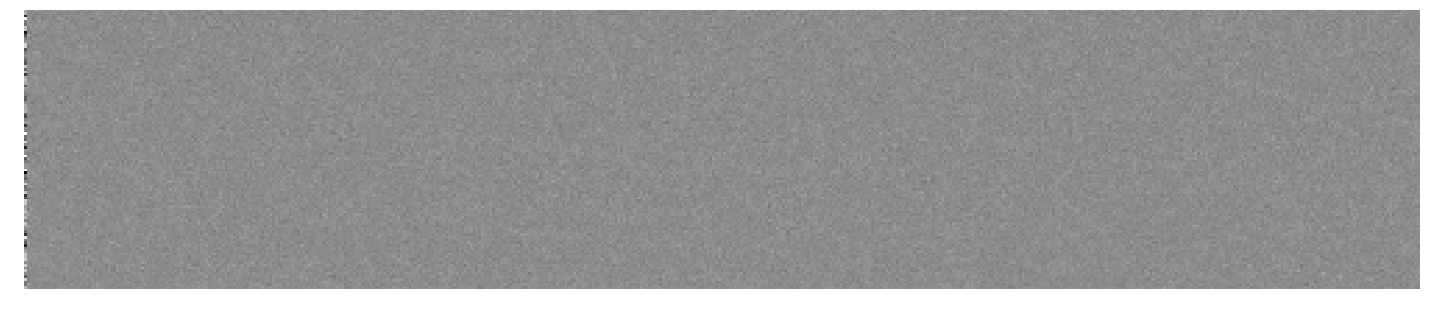

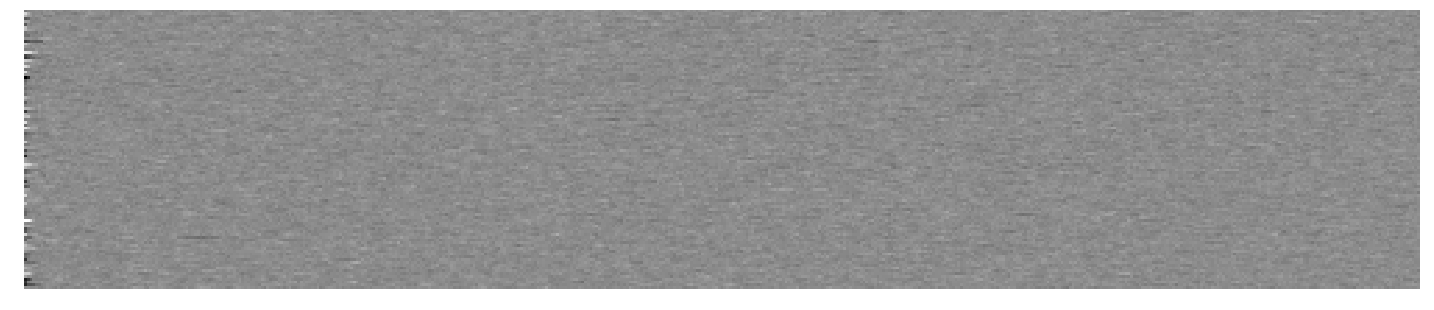

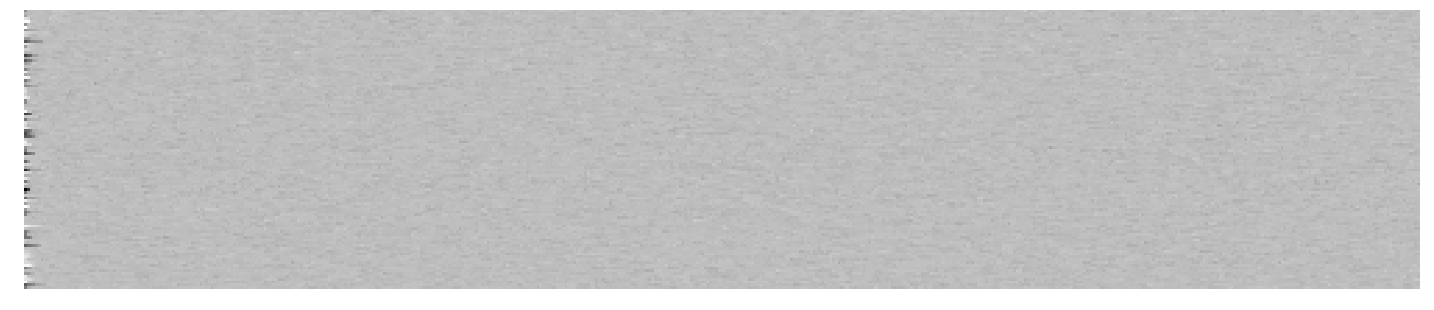

In [67]:
mat = np.random.normal(scale=0.01, size=(100, 100))
results = repeatedly_apply(mat, 500, perturb=0.1)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')


results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, perturb=0.1)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, input_gates=oneminusfgates, perturb=0.1)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

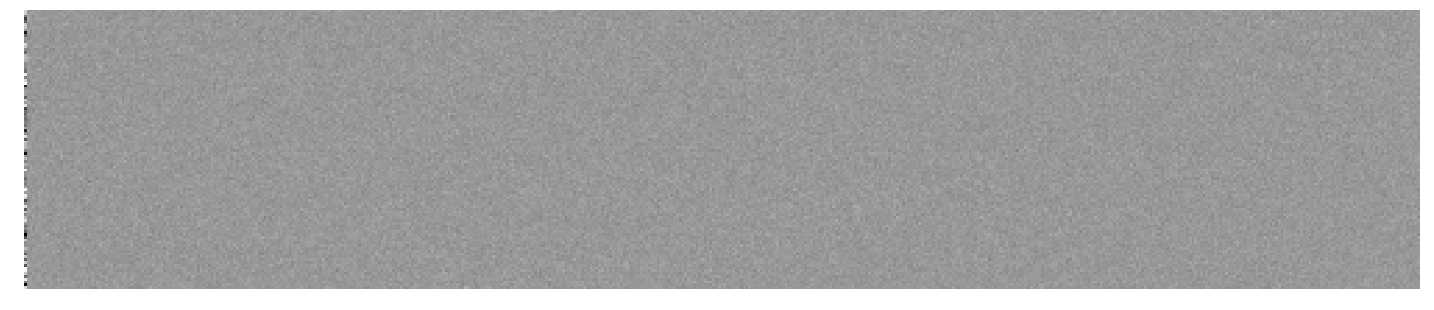

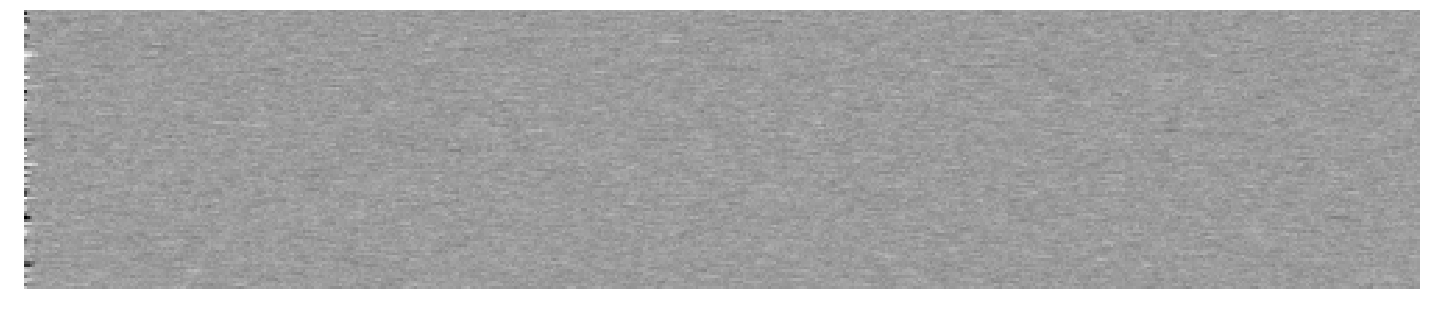

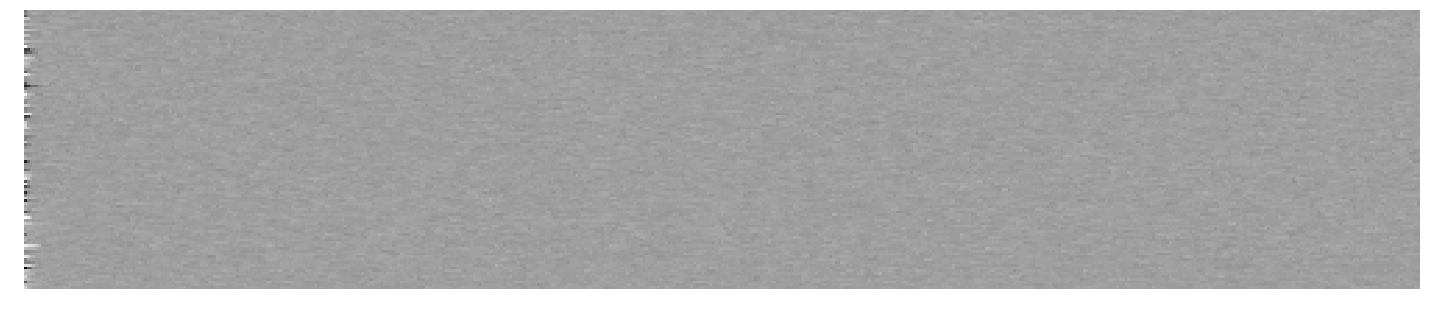

In [68]:
mat = np.random.normal(scale=0.01, size=(100, 100))
results = repeatedly_apply(mat, 500, perturb=0.1, nonlin=np.tanh)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, perturb=0.1, nonlin=np.tanh)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, input_gates=oneminusfgates, perturb=0.1, nonlin=np.tanh)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

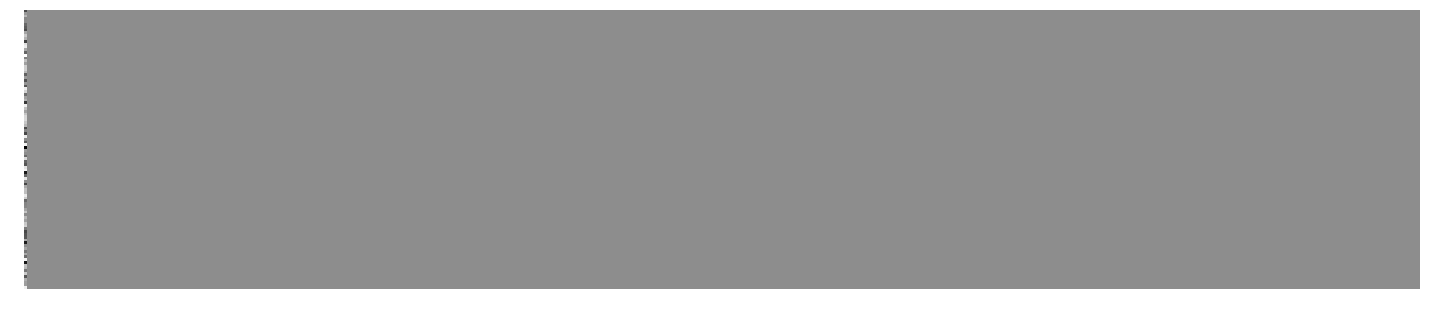

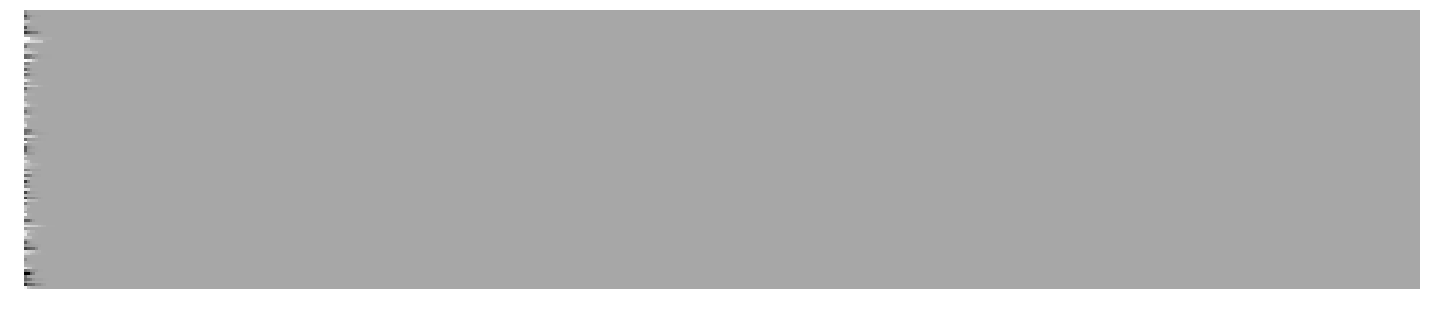

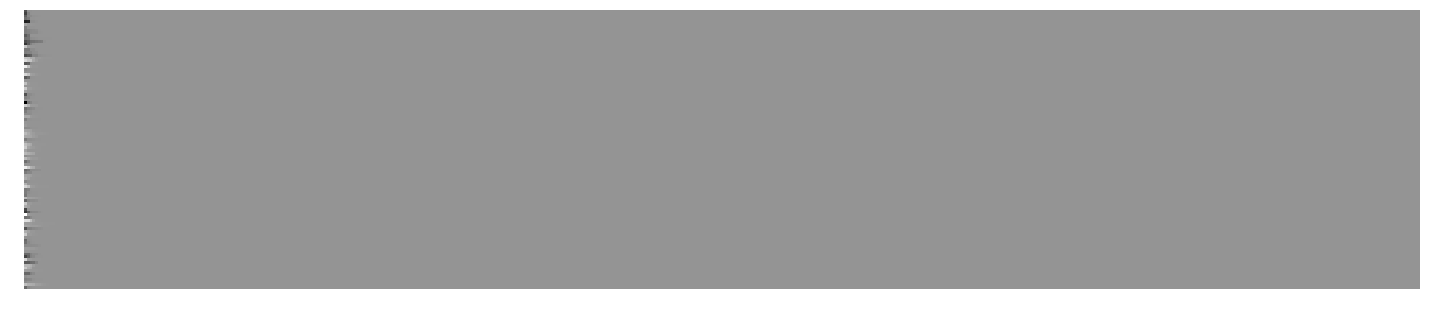

In [70]:
# divide matrix by the frobenius norm
mat = np.random.normal(scale=1.0, size=(100, 100))
mat /= np.sum(mat ** 2)
results = repeatedly_apply(mat, 500)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, input_gates=oneminusfgates)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

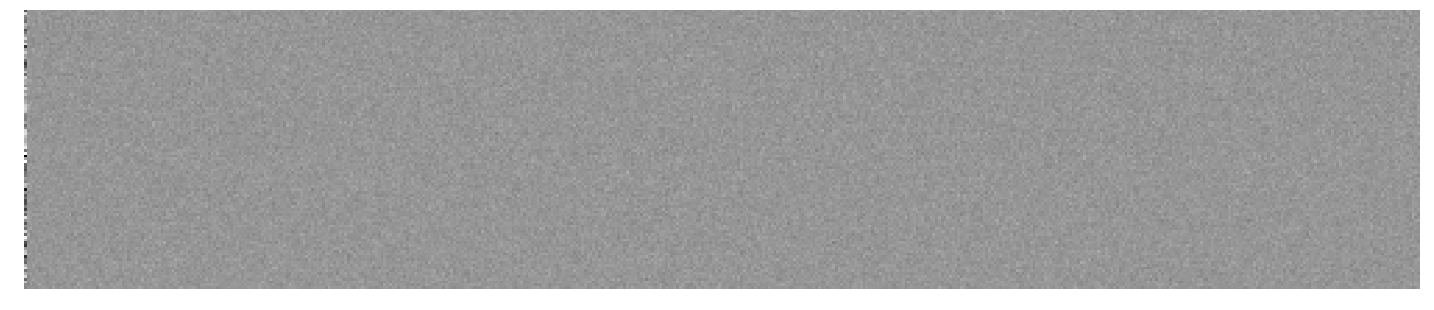

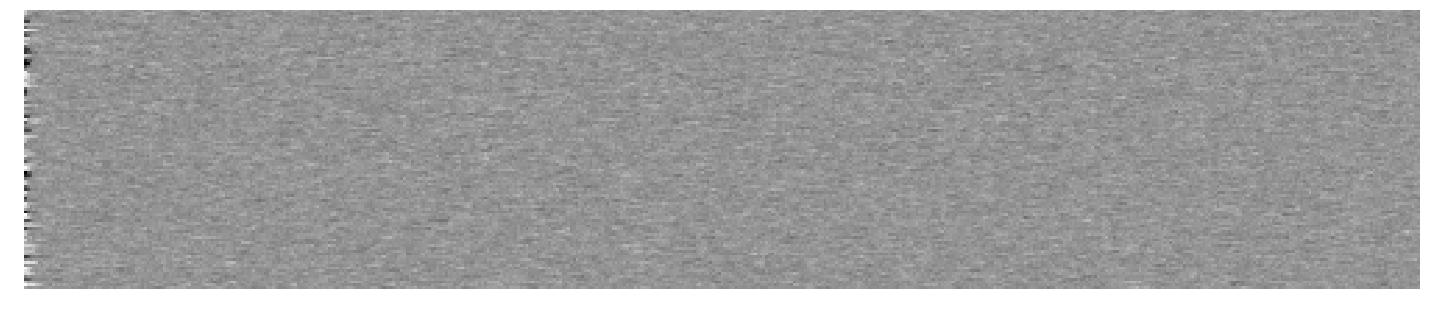

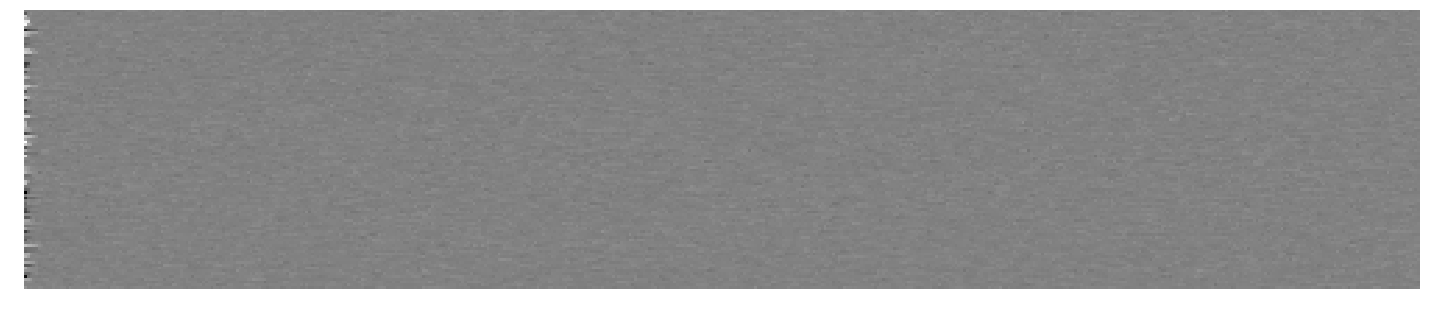

In [71]:
mat = np.random.normal(scale=0.01, size=(100, 100))
mat /= np.sum(mat ** 2)
results = repeatedly_apply(mat, 500, perturb=0.1)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, perturb=0.1)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, input_gates=oneminusfgates, perturb=0.1)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

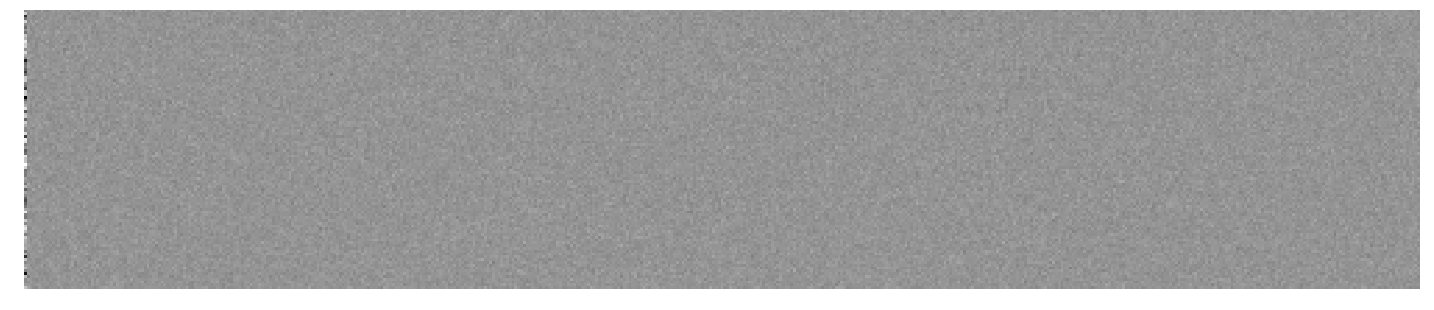

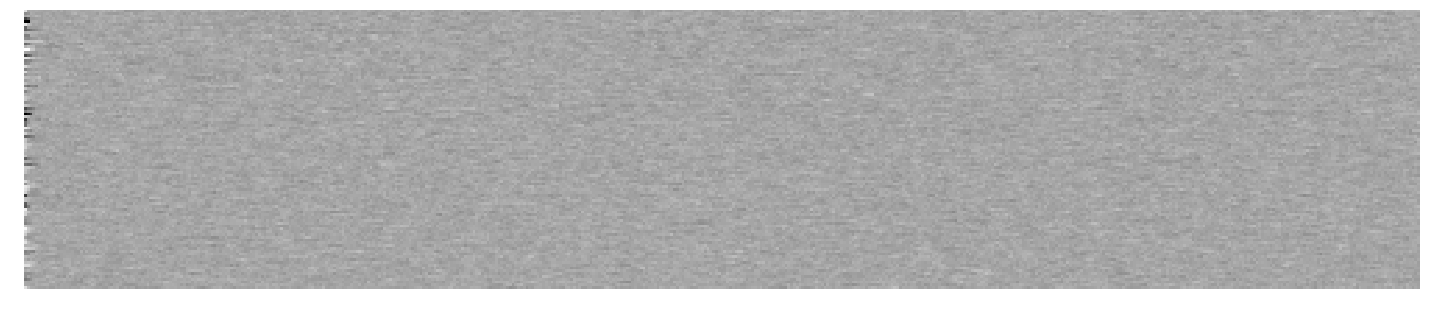

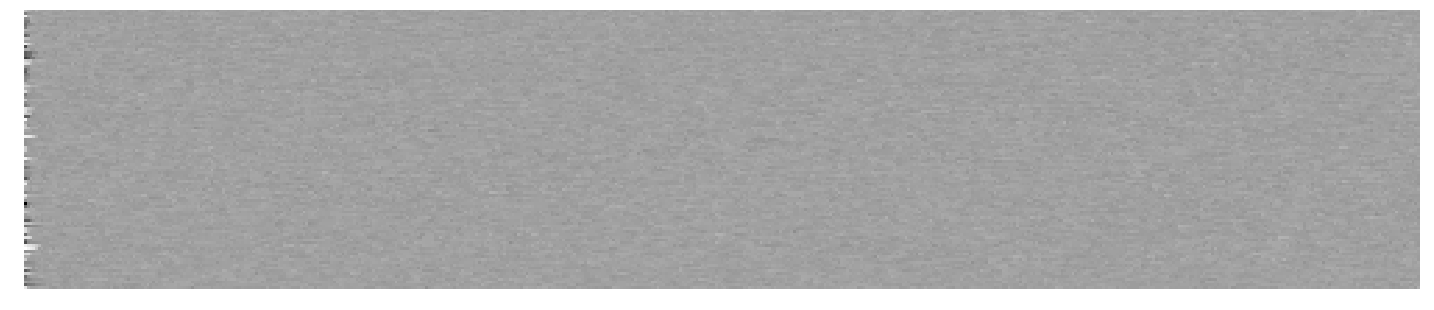

In [74]:
mat = np.random.normal(scale=0.01, size=(100, 100))
mat /= np.sum(mat ** 2)
results = repeatedly_apply(mat, 500, perturb=0.1, nonlin=np.tanh)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, perturb=0.1, nonlin=np.tanh)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, input_gates=oneminusfgates, perturb=0.1, nonlin=np.tanh)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

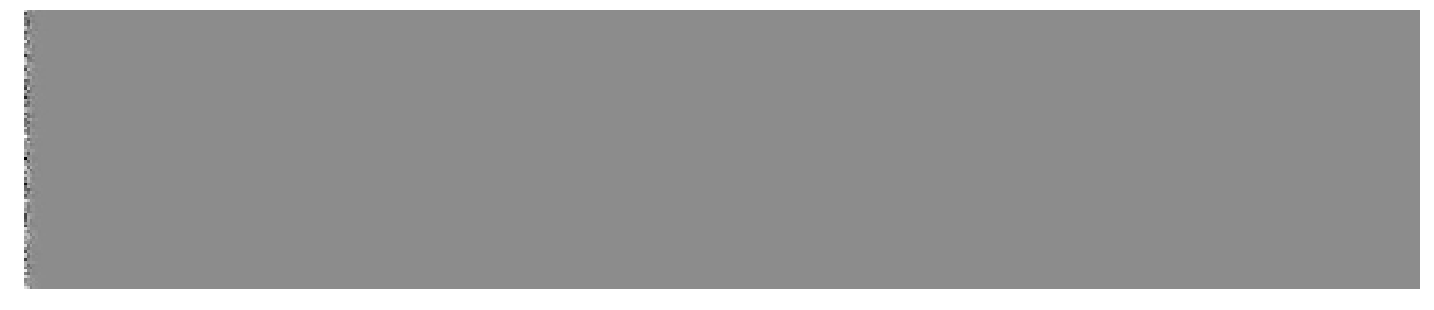

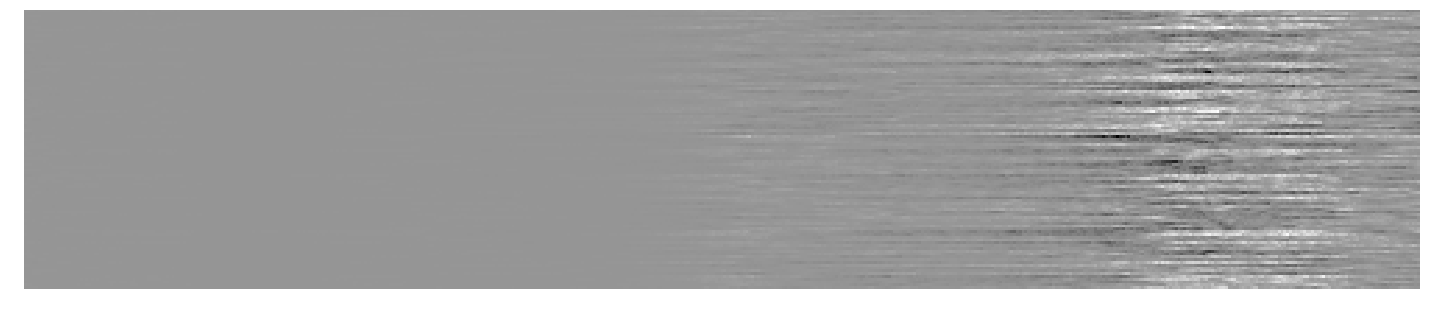

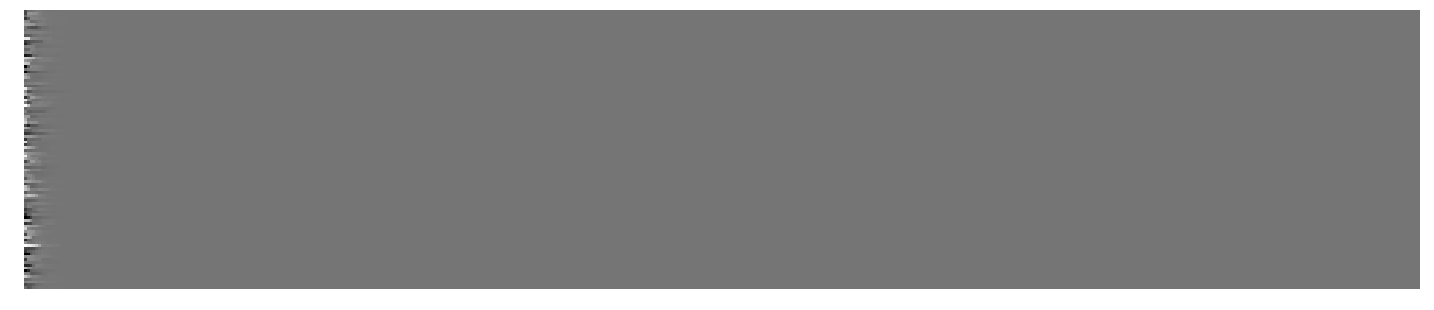

In [73]:
# divide by the spectral norm
mat = np.random.normal(scale=1.0, size=(100, 100))
svs = np.linalg.svd(mat, compute_uv=False)
mat /= (np.abs(svs[0]))
results = repeatedly_apply(mat, 500)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, input_gates=oneminusfgates)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

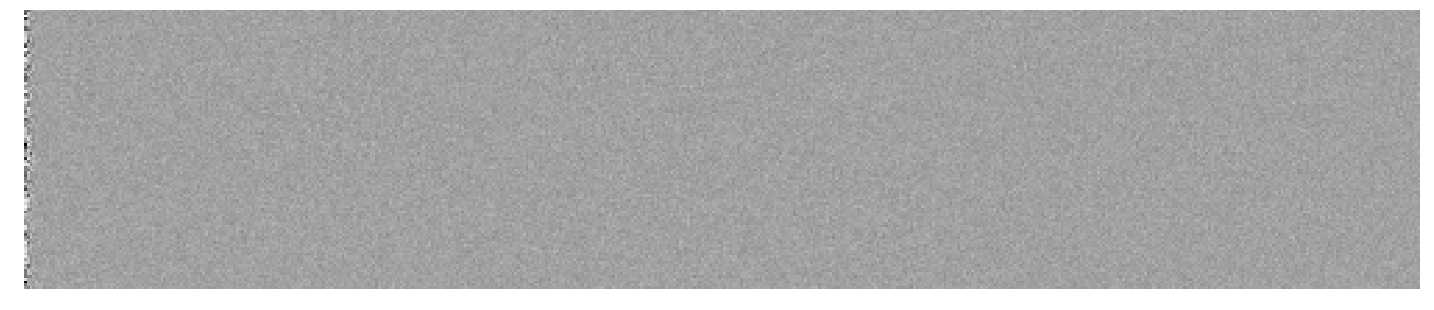

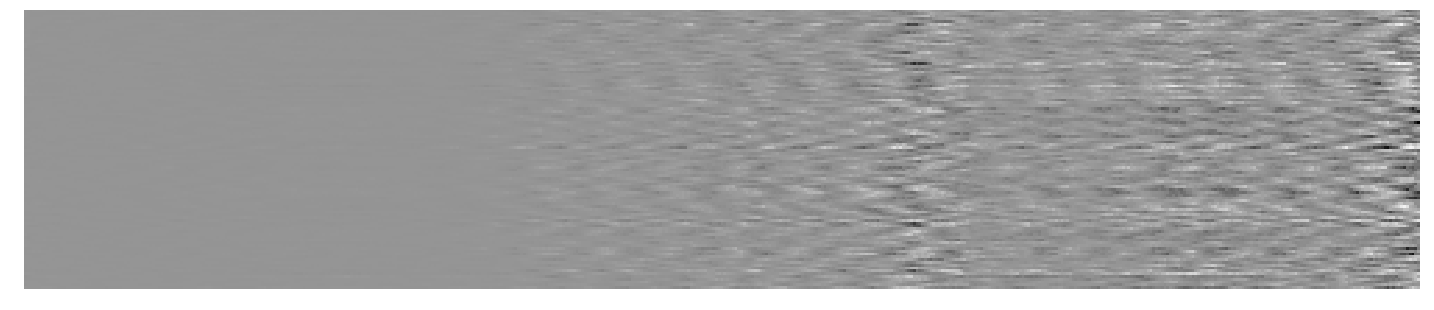

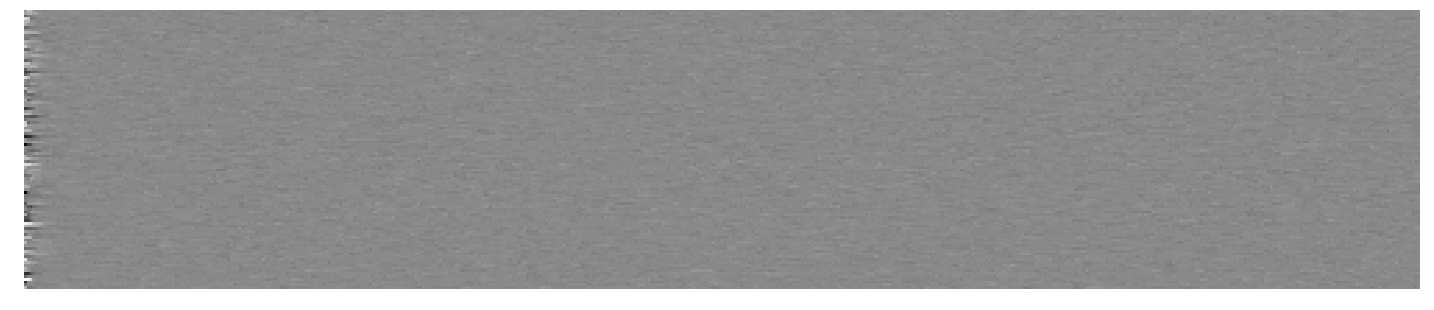

In [75]:
# divide by the spectral norm
mat = np.random.normal(scale=1.0, size=(100, 100))
svs = np.linalg.svd(mat, compute_uv=False)
mat /= (np.abs(svs[0]))
results = repeatedly_apply(mat, 500, perturb=0.1)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, perturb=0.1)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, input_gates=oneminusfgates, perturb=0.1)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

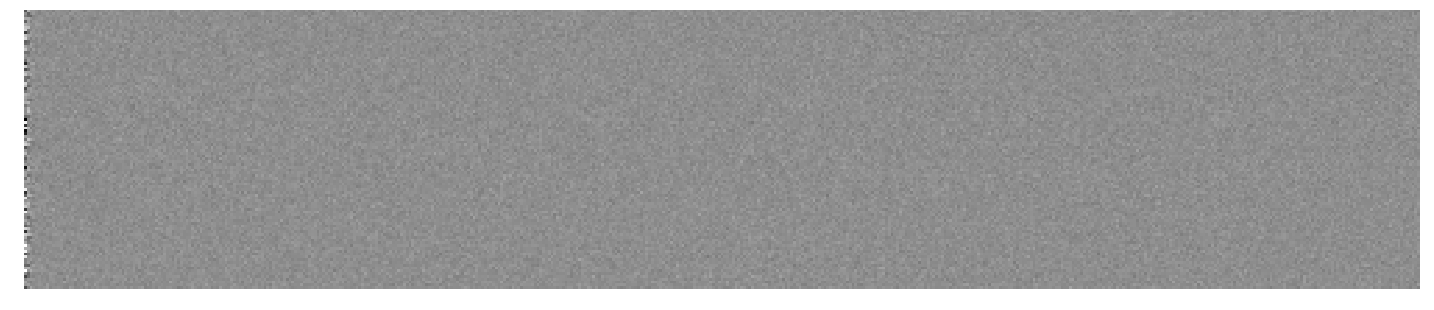

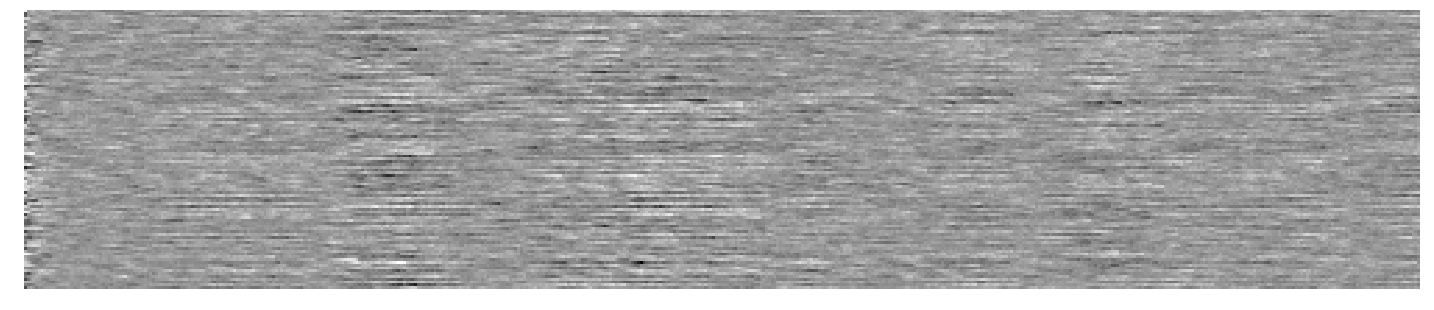

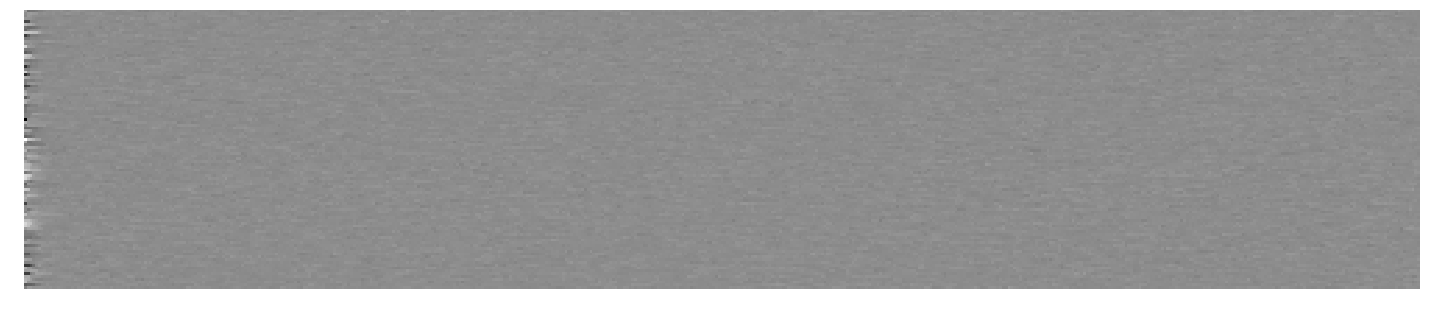

In [76]:
# divide by the spectral norm
mat = np.random.normal(scale=1.0, size=(100, 100))
svs = np.linalg.svd(mat, compute_uv=False)
mat /= (np.abs(svs[0]))
results = repeatedly_apply(mat, 500, perturb=0.1, nonlin=np.tanh)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, perturb=0.1, nonlin=np.tanh)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, input_gates=oneminusfgates, perturb=0.1, nonlin=np.tanh)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

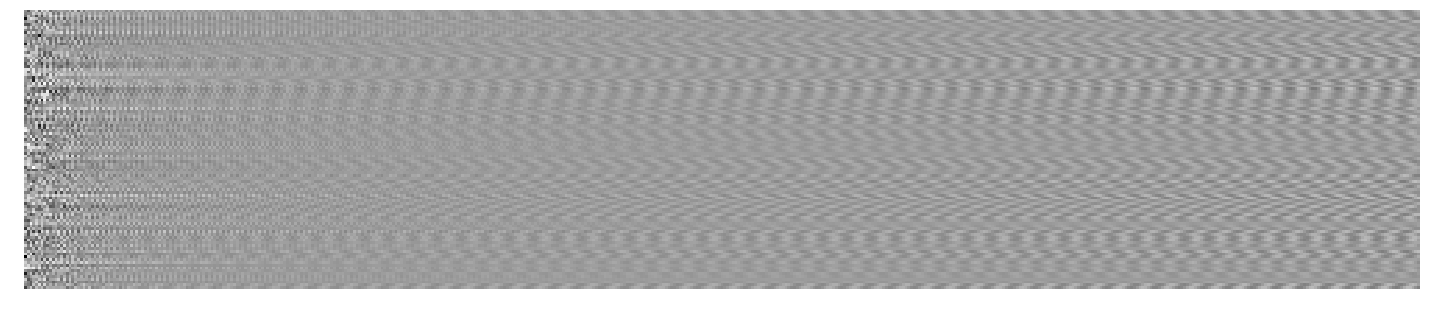

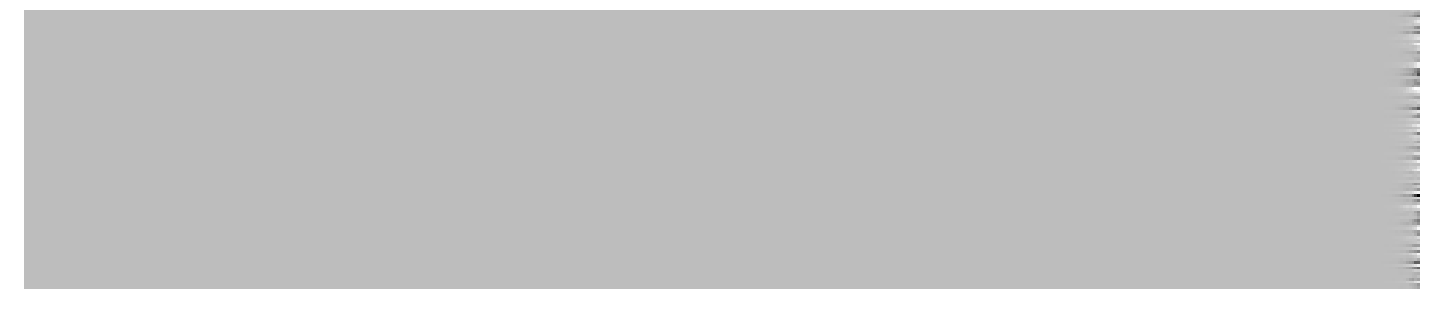

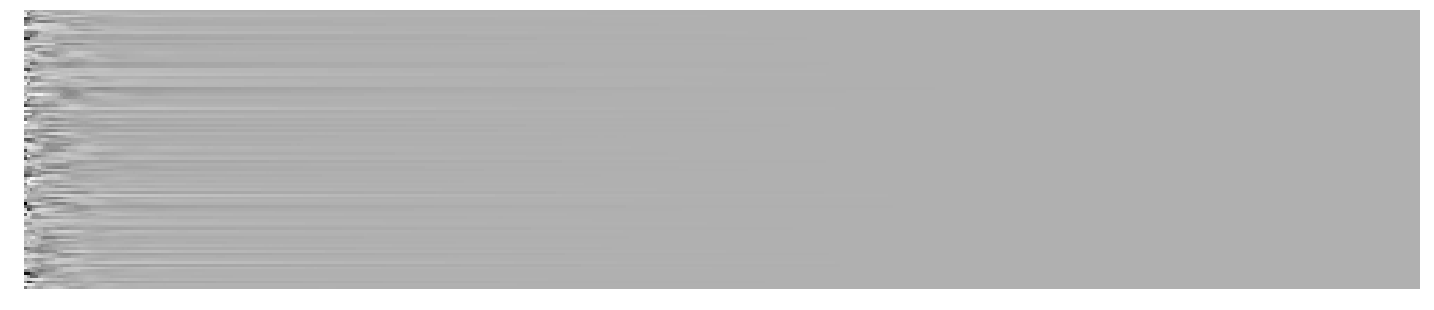

In [77]:
# divide by a fraction of the spectral norm
mat = np.random.normal(scale=1.0, size=(100, 100))
svs = np.linalg.svd(mat, compute_uv=False)
mat /= (0.53299 * np.abs(svs[0]))
results = repeatedly_apply(mat, 500)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, input_gates=oneminusfgates)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

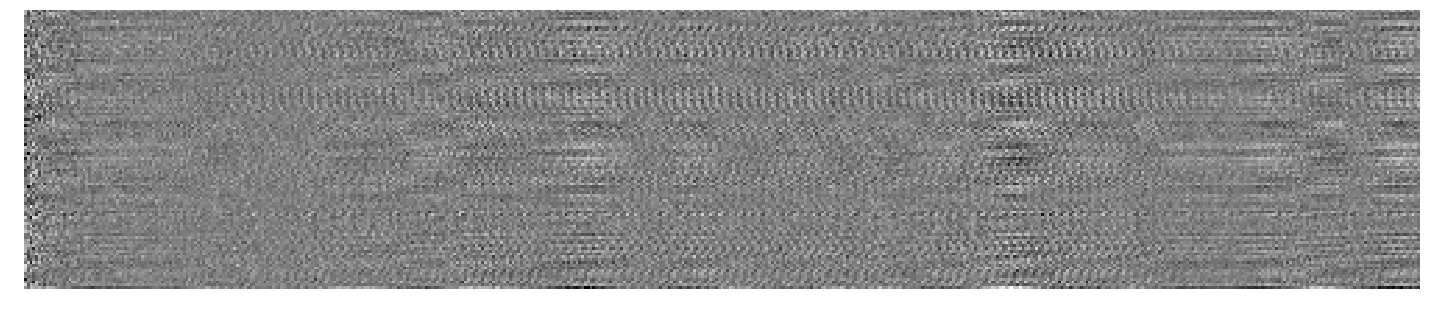

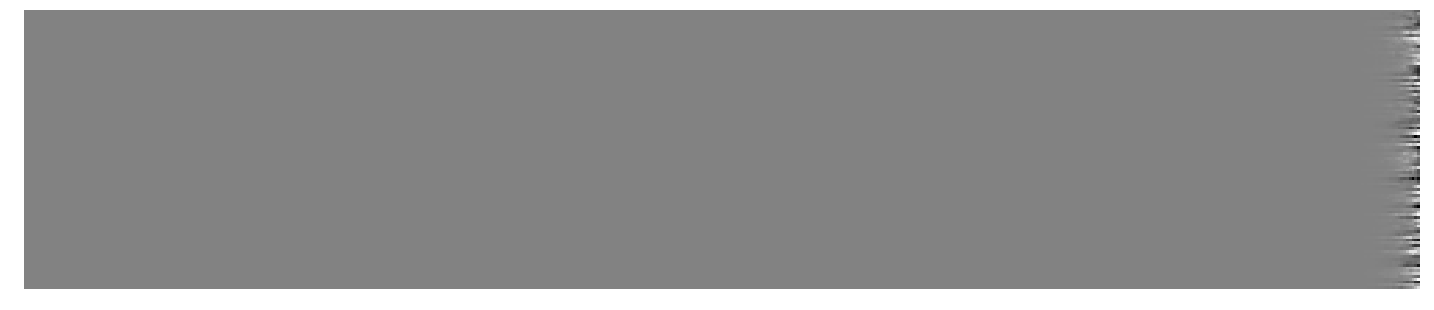

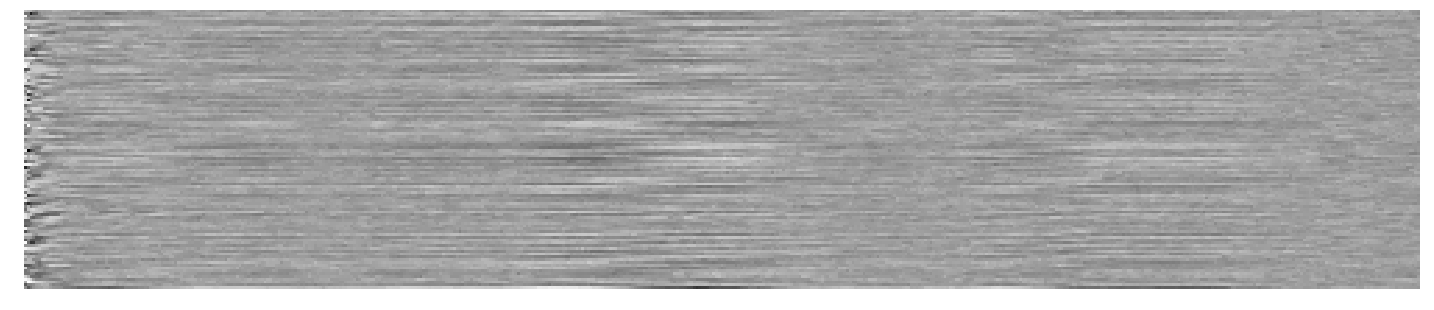

In [78]:
# divide by a fraction of the spectral norm
mat = np.random.normal(scale=1.0, size=(100, 100))
svs = np.linalg.svd(mat, compute_uv=False)
mat /= (0.53299 * np.abs(svs[0]))
results = repeatedly_apply(mat, 500, perturb=0.1)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, perturb=0.1)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, input_gates=oneminusfgates, perturb=0.1)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

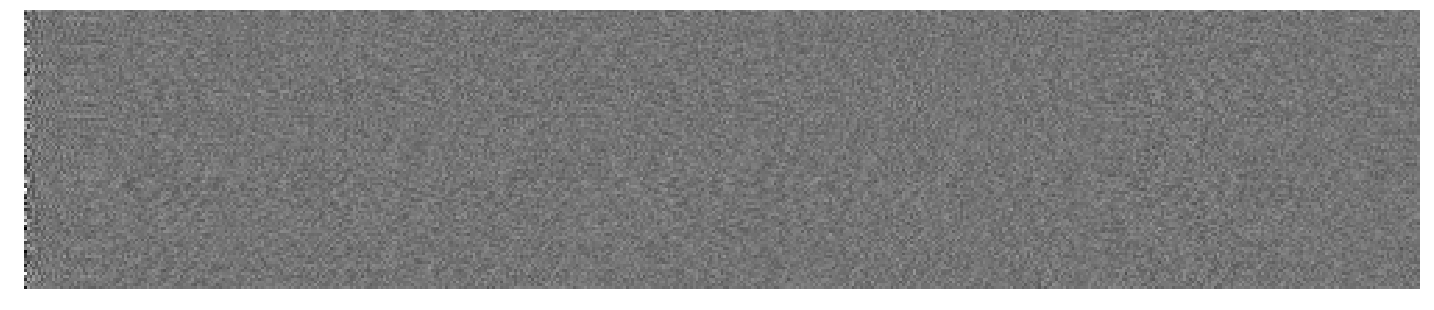

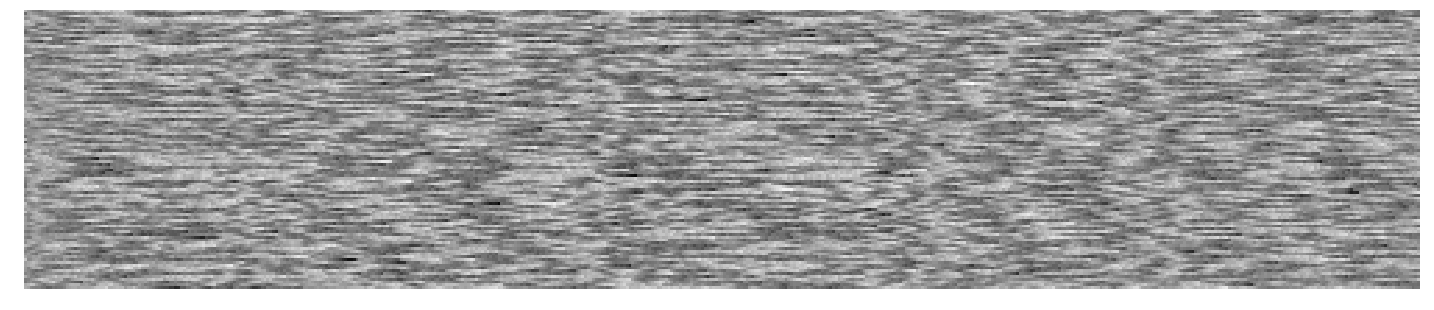

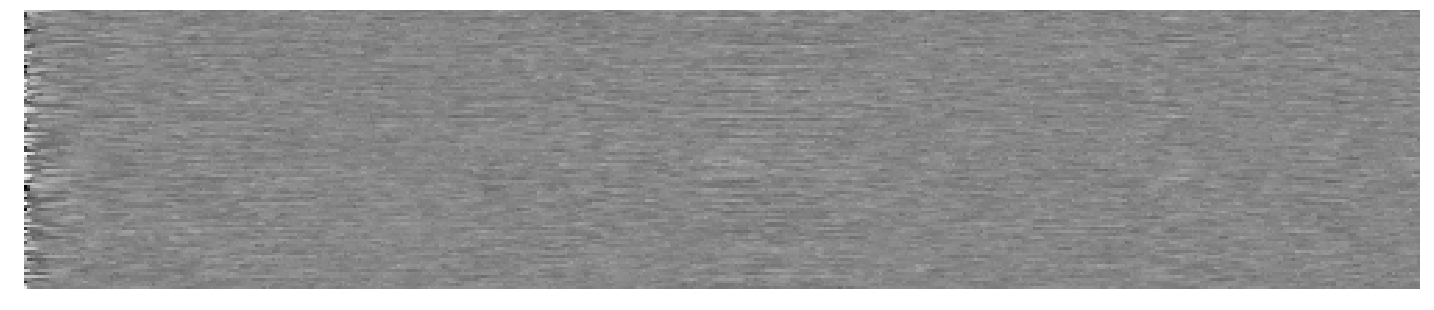

In [79]:
# divide by a fraction of the spectral norm
mat = np.random.normal(scale=1.0, size=(100, 100))
svs = np.linalg.svd(mat, compute_uv=False)
mat /= (0.53299 * np.abs(svs[0]))
results = repeatedly_apply(mat, 500, perturb=0.1, nonlin=np.tanh)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, perturb=0.1, nonlin=np.tanh)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, input_gates=oneminusfgates, perturb=0.1, nonlin=np.tanh)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

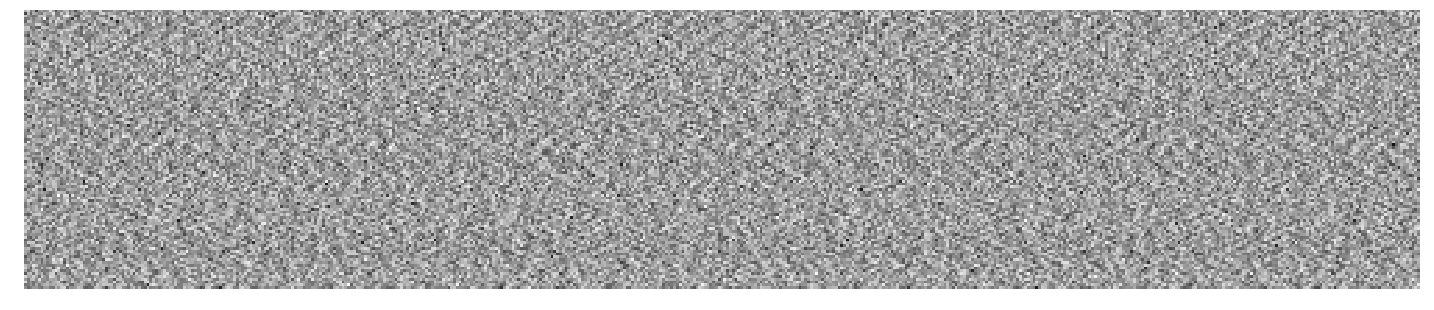

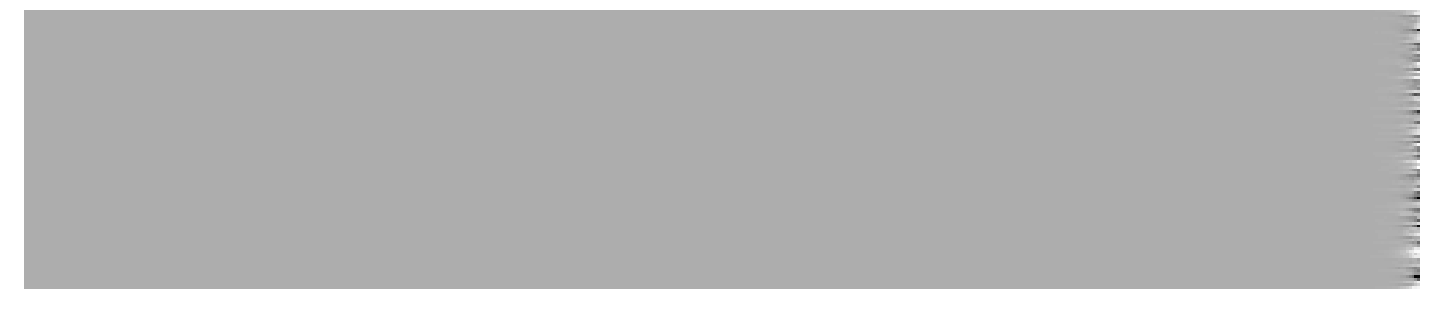

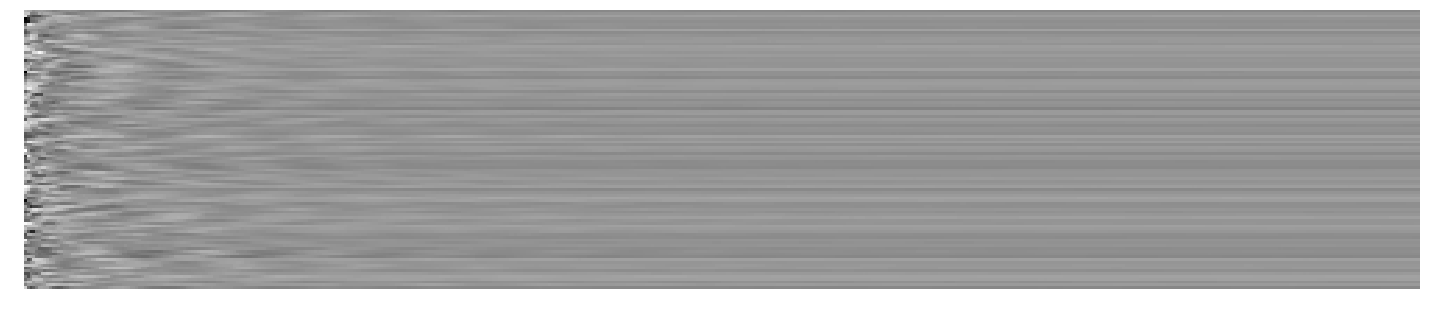

In [80]:
# make mat orthonormal
mat = np.random.normal(scale=1.0, size=(100, 100))
mat, _ = np.linalg.qr(mat)
results = repeatedly_apply(mat, 500)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, input_gates=oneminusfgates)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

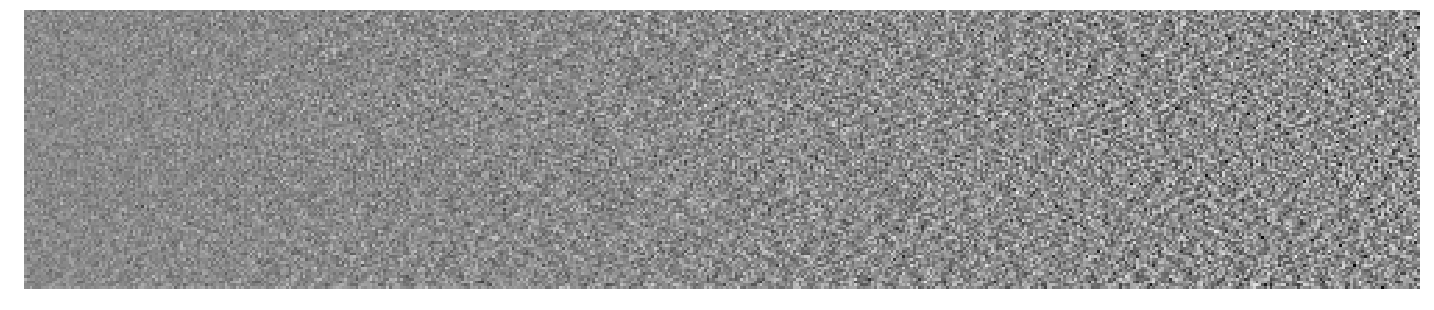

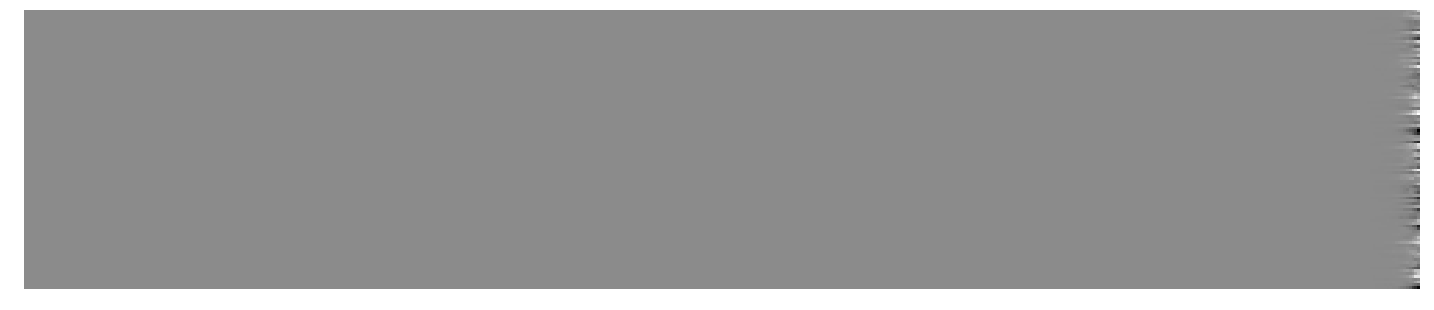

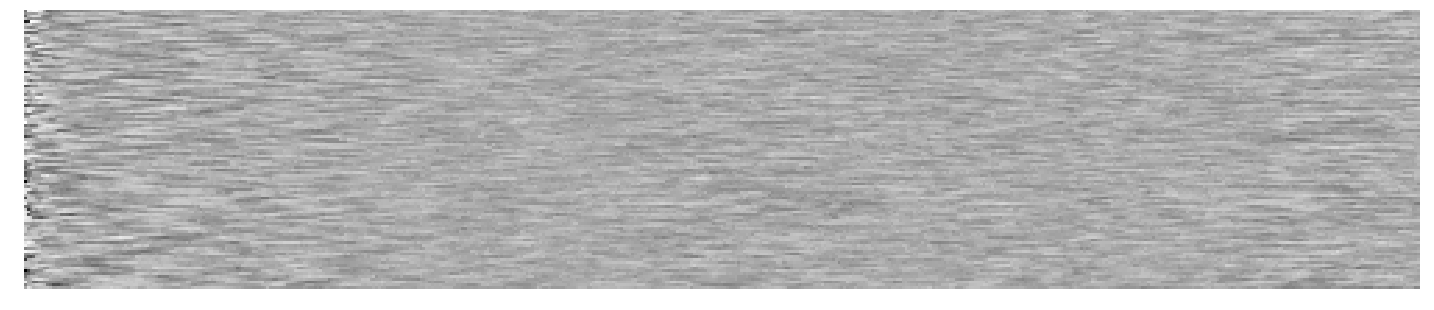

In [81]:
# make mat orthonormal
mat = np.random.normal(scale=1.0, size=(100, 100))
mat, _ = np.linalg.qr(mat)
results = repeatedly_apply(mat, 500, perturb=0.1)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, perturb=0.1)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, input_gates=oneminusfgates, perturb=0.1)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

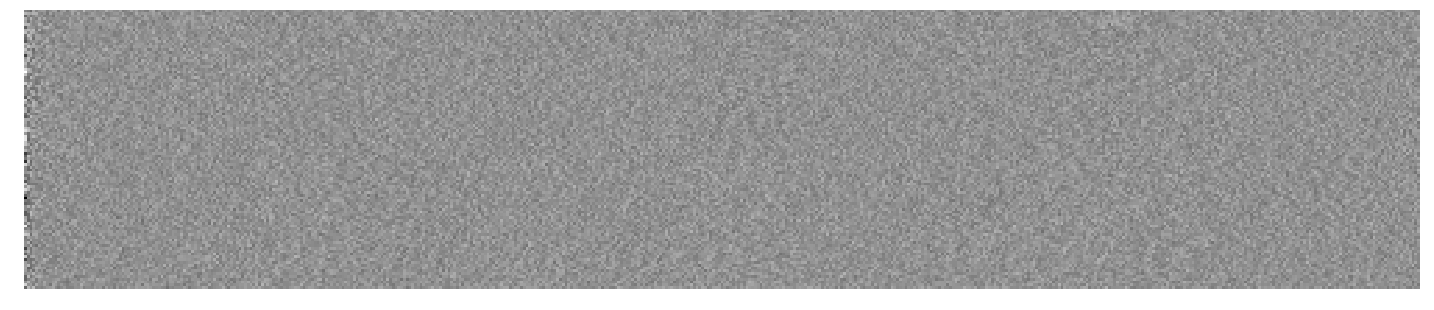

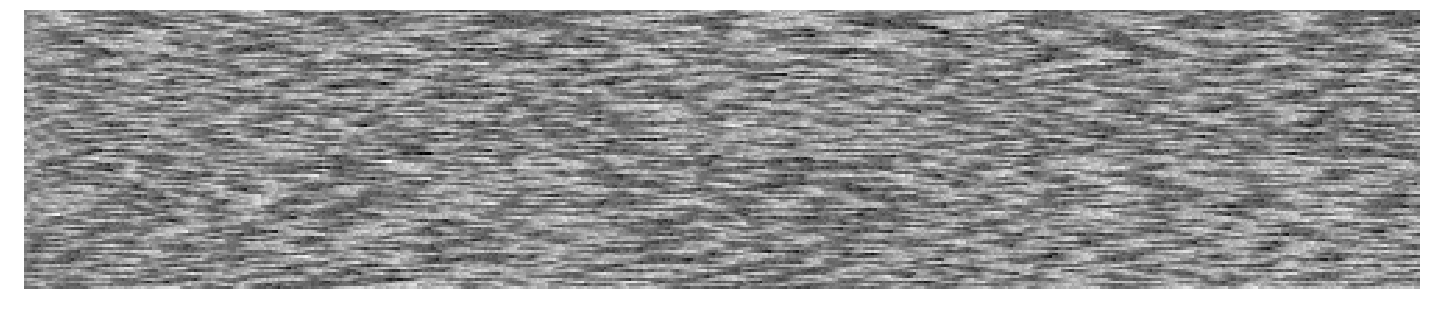

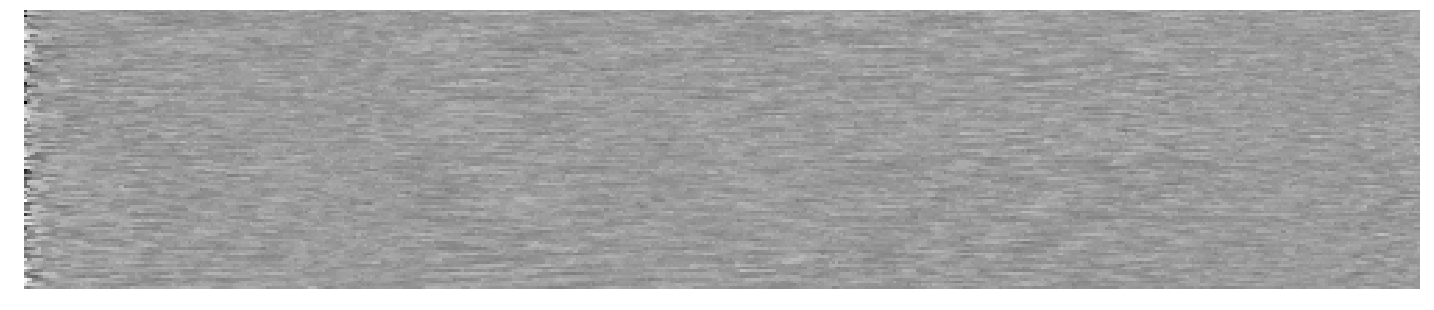

In [82]:
# make mat orthonormal
mat = np.random.normal(scale=1.0, size=(100, 100))
mat, _ = np.linalg.qr(mat)
results = repeatedly_apply(mat, 500, perturb=0.1, nonlin=np.tanh)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, perturb=0.1, nonlin=np.tanh)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()

results = repeatedly_apply_skip(mat, 500, forget_gates=fgates, input_gates=oneminusfgates, perturb=0.1, nonlin=np.tanh)
plt.figure(figsize=(25,10))
plt.imshow(results, interpolation='nearest', cmap='Greys')
plt.axis('off')
plt.show()